<a href="https://colab.research.google.com/github/Parishri07/Data-Science/blob/main/human_learn_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%pip install human-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.5/116.5 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 41.0 MB/s eta 0:00:00
  Attempting uninstall: bokeh
    Found existing installation: bokeh 3.3.4
    Uninstalling bokeh-3.3.4:
      Successfully uninstalled bokeh-3.3.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
panel 1.3.8 requires bokeh<3.4.0,>=3.2.0, but you have bokeh 2.4.3 which is incompatible.


In [3]:
import numpy as np
import pandas as pd

from hulearn.datasets import load_titanic
from sklearn.model_selection import GridSearchCV

In [4]:
df = load_titanic(as_frame=True)
df

,survived,pclass,name,sex,age,fare,sibsp,parch
0,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,1,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,1,0
4,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,0,0
...,...,...,...,...,...,...,...,...
709,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,29.1250,0,5
710,0,2,"Montvila, Rev. Juozas",male,27.0,13.0000,0,0
711,1,1,"Graham, Miss. Margaret Edith",female,19.0,30.0000,0,0
712,1,1,"Behr, Mr. Karl Howell",male,26.0,30.0000,0,0


In [5]:
X, y = df.drop(columns=['survived']), df['survived']
X

,pclass,name,sex,age,fare,sibsp,parch
0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,1,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,1,0
2,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,0,0
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,1,0
4,3,"Allen, Mr. William Henry",male,35.0,8.0500,0,0
...,...,...,...,...,...,...,...
709,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,29.1250,0,5
710,2,"Montvila, Rev. Juozas",male,27.0,13.0000,0,0
711,1,"Graham, Miss. Margaret Edith",female,19.0,30.0000,0,0
712,1,"Behr, Mr. Karl Howell",male,26.0,30.0000,0,0


In [6]:
y

0      0
1      1
2      1
3      1
4      0
      ..
709    0
710    0
711    1
712    1
713    0
Name: survived, Length: 714, dtype: int64

In [ ]:
X.isnull().sum()

pclass    0
name      0
sex       0
age       0
fare      0
sibsp     0
parch     0
dtype: int64

In [ ]:
X.describe()

,pclass,age,fare,sibsp,parch
count,714.000000,714.000000,714.000000,714.000000,714.000000
mean,2.236695,29.699118,34.694514,0.512605,0.431373
std,0.838250,14.526497,52.918930,0.929783,0.853289
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,1.000000,20.125000,8.050000,0.000000,0.000000
50%,2.000000,28.000000,15.741700,0.000000,0.000000
75%,3.000000,38.000000,33.375000,1.000000,1.000000
max,3.000000,80.000000,512.329200,5.000000,6.000000


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pclass  714 non-null    int64  
 1   name    714 non-null    object 
 2   sex     714 non-null    object 
 3   age     714 non-null    float64
 4   fare    714 non-null    float64
 5   sibsp   714 non-null    int64  
 6   parch   714 non-null    int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 39.2+ KB


In [7]:
def fare_based(dataf, threshold=10):
  return np.array(dataf['fare'] > threshold).astype(int)

In [8]:
from hulearn.classification import FunctionClassifier
mod = FunctionClassifier(fare_based, threshold=10)

In [9]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, make_scorer

grid = GridSearchCV(mod,
                    cv=2,
                    param_grid={'threshold': np.linspace(0, 100, 30)},
                    scoring={'accuracy': make_scorer(accuracy_score),
                             'precision': make_scorer(precision_score),
                             'recall': make_scorer(recall_score)},
                    refit='accuracy'
                  )
grid.fit(X, y)

GridSearchCV(cv=2,
             estimator=FunctionClassifier(func=<function fare_based at 0x7d3792dae050>,
                                          threshold=10),
             param_grid={'threshold': array([  0.        ,   3.44827586,   6.89655172,  10.34482759,
        13.79310345,  17.24137931,  20.68965517,  24.13793103,
        27.5862069 ,  31.03448276,  34.48275862,  37.93103448,
        41.37931034,  44.82758621,  48.27586207,  51.72413793,
        55.17241379,  58.62068966,  62.06896552,  65.51724138,
        68.96551724,  72.4137931 ,  75.86206897,  79.31034483,
        82.75862069,  86.20689655,  89.65517241,  93.10344828,
        96.55172414, 100.        ])},
             refit='accuracy',
             scoring={'accuracy': make_scorer(accuracy_score),
                      'precision': make_scorer(precision_score),
                      'recall': make_scorer(recall_score)})

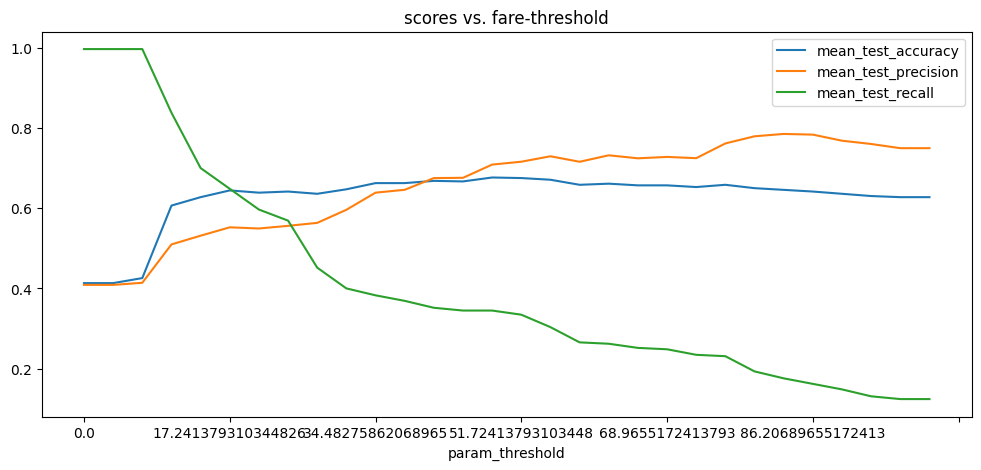

In [10]:
import pandas as pd

score_df = (pd.DataFrame(grid.cv_results_)
  .set_index('param_threshold')
  [['mean_test_accuracy', 'mean_test_precision', 'mean_test_recall']])

score_df.plot(figsize=(12, 5), title="scores vs. fare-threshold");

In [11]:
%pip install scikit-lego

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.1/216.1 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.0/70.0 kB 8.6 MB/s eta 0:00:00


In [13]:
from sklego.datasets import load_penguins
from hulearn.experimental.interactive import InteractiveCharts

df=load_penguins(as_frame=True).dropna()

In [14]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male


In [16]:
clf = InteractiveCharts(df, labels='species')

In [17]:
clf.add_chart(x="bill_length_mm", y="bill_depth_mm", legend=False)

Bokeh show_app is currently unsupported


In [ ]:
clf.add_chart(x="flipper_length_mm", y="body_mass_g")

In [ ]:
from hulearn.classification import InteractiveClassifier

model = InteractiveClassifier(json_desc=clf.data())

In [ ]:
X, y = df.drop(columns=['species']), df['species']

preds = model.fit(X, y).predict_proba(X)

In [ ]:
import matplotlib.pylab as plt

plt.figure(figsize=(12, 3))
for i in range(3):
    plt.subplot(131 + i)
    plt.scatter(X['bill_length_mm'], X['bill_depth_mm'], c=preds[:, i])
    plt.xlabel('bill_length_mm')
    plt.ylabel('bill_depth_mm')
    plt.title(model.classes_[i])

In [ ]:
plt.figure(figsize=(12, 3))
for i in range(3):
    plt.subplot(131 + i)
    plt.scatter(X['flipper_length_mm'], X['body_mass_g'], c=preds[:, i])
    plt.xlabel('flipper_length_mm')
    plt.ylabel('body_mass_g')
    plt.title(model.classes_[i])